# MAD-X Simulations

This section is based on the **BL2_TDC** ATF example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

In [1]:
%run -i ../../../examples/prepare_flyer_env.py

import matplotlib.pyplot as plt

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.madx_flyer import MADXFlyer
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("madx", "00000001")
classes, objects = create_classes(connection.data,
                                  connection=connection,
                                  extra_model_fields=["rpnVariables"])
globals().update(**objects)

madx_flyer = MADXFlyer(connection=connection,
                       root_dir="/tmp/sirepo-bluesky-data",
                       report="elementAnimation250-20")

def madx_plan(parameter=ihq1, value=2.0):
    yield from bps.mv(parameter.value, value)
    return (yield from bp.fly([madx_flyer]))

(uid,) = RE(madx_plan())
hdr = db[uid]
tbl = hdr.table(stream_name="madx_flyer", fill=True)
print(tbl)



Transient Scan ID: 1     Time: 2022-12-21 00:27:48
Persistent Unique Scan ID: 'd4610e79-c062-4a04-8a50-15a98fbc6e99'


New stream: 'madx_flyer'





                                 time      madx_flyer_NAME madx_flyer_S  \
seq_num                                                                   
1       2022-12-21 00:27:57.130152464  BEAMLINE_FULL$START          0.0   
2       2022-12-21 00:27:57.130193232                 HO00          0.2   
3       2022-12-21 00:27:57.130214930                HPOP1          0.2   
4       2022-12-21 00:27:57.130232572                HT1HV          0.2   
5       2022-12-21 00:27:57.130247593                 HO01         0.37   
...                               ...                  ...          ...   
157     2022-12-21 00:27:57.132438421                 GO38  27.53831648   
158     2022-12-21 00:27:57.132451534                 GD32  27.81538296   
159     2022-12-21 00:27:57.132464169                 GO39  27.93538296   
160     2022-12-21 00:27:57.132478714                 GP12  27.93538296   
161     2022-12-21 00:27:57.132493734    BEAMLINE_FULL$END  27.93538296   

        madx_flyer_BETX 

/usr/share/miniconda3/envs/sirepo-bluesky-py3.9/lib/python3.9/site-packages/event_model/__init__.py:224: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


### Get the data via databroker API

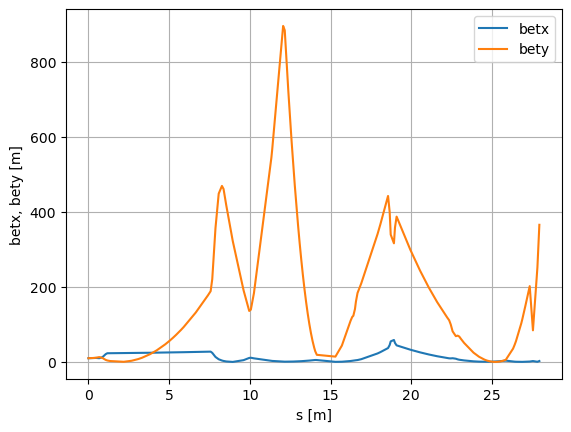

In [2]:
s = tbl["madx_flyer_S"]
betx = tbl["madx_flyer_BETX"]
bety = tbl["madx_flyer_BETY"]

plt.figure()
plt.plot(s, betx, label="betx")
plt.plot(s, bety, label="bety")
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")
plt.grid()
plt.legend()

### Get the data from the original TFS file

In [3]:
import os
import tfs

for name, doc in hdr.documents():
    if name == "resource":
        resource_doc = doc
        print(resource_doc)
filename = os.path.join(resource_doc["root"], resource_doc["resource_path"])
df = tfs.read(filename)


Resource
path_semantics  : posix                                   
resource_kwargs :
resource_path   : 2022/12/21/448e9578-b7d6-40bf-9202-1242255eebaf.tfs
root            : /tmp/sirepo-bluesky-data                
run_start       : d4610e79-c062-4a04-8a50-15a98fbc6e99    
spec            : madx                                    
uid             : 81574c3b-8942-4493-a5e7-332b42001986    


In [4]:
df

,NAME,S,BETX,ALFX,BETY,ALFY,DX,DY
0,BEAMLINE_FULL$START,0.000000,10.000000,-1.000000,10.000000,-1.000000,0.000000,0.000000
1,HO00,0.200000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.000000
2,HPOP1,0.200000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.000000
3,HT1HV,0.200000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.000000
4,HO01,0.370000,10.767380,-1.074000,10.767380,-1.074000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
156,GO38,27.538316,2.396884,-3.863283,84.268095,230.907717,-0.000813,0.220493
157,GD32,27.815383,0.516415,-5.146490,252.407534,-427.206982,0.000349,0.781778
158,GO39,27.935383,2.518017,-11.533533,365.349332,-513.974663,0.000803,1.101499
159,GP12,27.935383,2.518017,-11.533533,365.349332,-513.974663,0.000803,1.101499


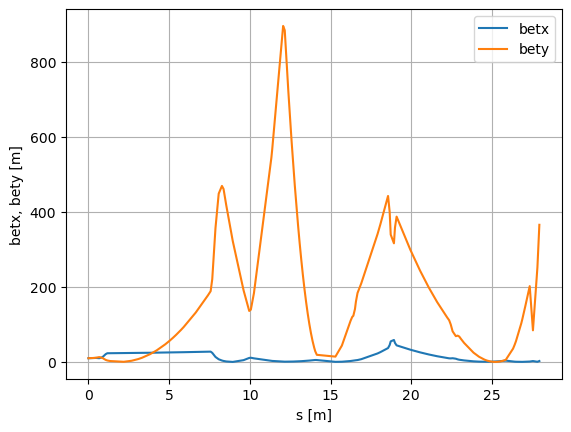

In [5]:
plt.figure()
plt.plot(df["S"], df["BETX"], label="betx")
plt.plot(df["S"], df["BETY"], label="bety")
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")
plt.grid()
plt.legend()

### Screenshot from Sirepo website

![image.png](../../../images/madx_twiss2_file.png)